<a href="https://colab.research.google.com/github/atonendeley/Atonye-Endeley/blob/main/Atonye_Endeley_Data_Science_20042023_CE_880_Predicting_Hotel_Cancellations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atonye** **Endeley** **2103195** **Data Science Project Assignment**
# **Predicting the cancellation of hotel booking**

## Cancellation Prediction Model: 86% Accuracy



## Introduction
## Importing
## Exploratory Analysis
## Feature engineering
## Model Selection


Introduction
The hotel market, worldwide has not yet fully recovered from the recession caused by the COVID-19 pandemic. One of the biggest problems facing this market is cancellation of reservations. Sites like Booking.com have caused cancellation fees to drop in price or even cease to exist, making there no real penalty for a cancellation. Using this dataset the aim is to create an exploratory analysis in order to find patterns that can help solve business problems and optimize profit. This is based mainly to create a predictive machine learning model to classify which reservations will be cancelled.

In [ ]:
!pip install plotly --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 17.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [ ]:
!pip install pandas-profiling


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **IMPORT LIBRARIES/DATASETS AND VISUALIZE DATA**
---



# **Importing Libraries**


In [ ]:
import numpy as np # linear algebra
import pandas as pd #data processing
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import pandas_profiling
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
%matplotlib inline


<ipython-input-7-4b2a3d9339f4>:8: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



## Loading and Organising Data

In [ ]:
df = pd.read_excel("/content/HotelCancelation.xlsx")
df.head(3)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled

In [ ]:
df

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                           0   
1                      3      Not Selected                           0   
2                      1       Meal Plan 1                           0   
3                      2       Meal Plan 1                           0   
4                      1      Not Selected                           0   
...                  ...               ...                         ...   
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
0            Room_Type 1        224          2017             10   
1            Room_Type 1          5          2018             11   
2            Room_Type 1          1          2018              2   
3            Room_Type 1        211          2018              5   
4            Room_Type 1         48          2018              4   
...                  ...        ...           ...            ...   
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
0                 2             Offline               0   
1                 6              Online               0   
2                28              Online               0   
3                20              Online               0   
4                11              Online               0   
...             ...                 ...             ...   
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
36270                             0                                     0   
36271                             0                                     0   
36272                            

In [ ]:
df.describe()


no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     85.930817      0.383836       3.069894   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     17.000000   2018.000000       5.000000   
50%                      0.000000     57.000000   2018.000000       8.000000   
75%                      0.000000    126.000000   2018.000000      10.000000   
max                      1.000000    443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count  36275.000000    36275.000000                  36275.000000   
mean      15.596995        0.025637                      0.023349   
std        8.740447        0.158053                      0.368331   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          36275.000000        36275.000000   
mean                               0.153411          103.423539   
std                                1.754171           35.089424   
min                                0.000000            0.000000   
25%                                0.000000           80.300000   
50%                                0.000000           99.450000   
75%                                0.000000          120.000000   
max                               58.000000          540.000000   

       no_of_special_requests  
count            36275.000000  
mean                 0.619655  
std                  0.786236  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  5.000000

The results of .describe() shows a number of things. We can confirm the information provided from data source shows the arrival dates are from 2017 to 2018, but also see the shape of the dataset being 36275 rows  and 19 columns.

It allows us to determine which parameters are Boolean (0 or 1), in this case:


repeated_guest
required_ car_ parking_ space,
We can also look at the min and max values, and check that they are realistic values. For example, the arrival date can range from 1 to 31.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

We can see that most parameters have as many non-null values as the total number of rows in the dataframe.
Meaning that there are no null values.


In [ ]:
# checking for duplicate data, if any
df[df.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no duplicate entries in the dataset

# **Exploratory Analysis**

In [ ]:
# cross check and count the number of missing or NaN (Not a Number) values
df.isna().sum()


Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Confirms no missing values

In [ ]:
import pandas_profiling
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile = df.profile_report()


In [ ]:
# Exporting the report to a file
profile.to_file(output_file="Report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

From the result it is observered that there are no missing or duplicate rows.
Also reservations last on average two days and during the week, rarely with children and with one or two adults

The next step is to try and find a peak period, that is, a period with a higher number of bookings than the rest of the year.  To do this a graph will be plotted to measure the amount of reserves made per month in each year


In [ ]:
# view the size of the data set
df.shape

(36275, 19)

In [ ]:
# view the data types of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# check for duplicate values
df[df.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

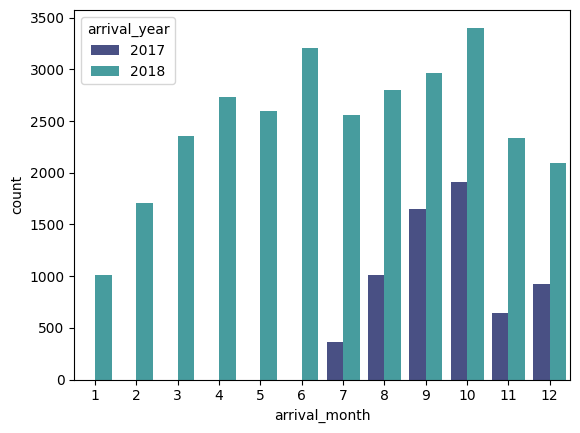

In [ ]:
import matplotlib.pyplot as plt
sns.countplot(x ='arrival_month', hue = "arrival_year", data = df, palette ="mako")
plt.show()

From the graph the low period starts from November to February (i.e month 11 to 2), although it is not certain because the dataset has a low number of years. Next is to analyse  if there is some impact of this low season on the cancelation rate.

# OBS: In the graphs, colour green will be applied to the non_canceled booking and red for the canceled

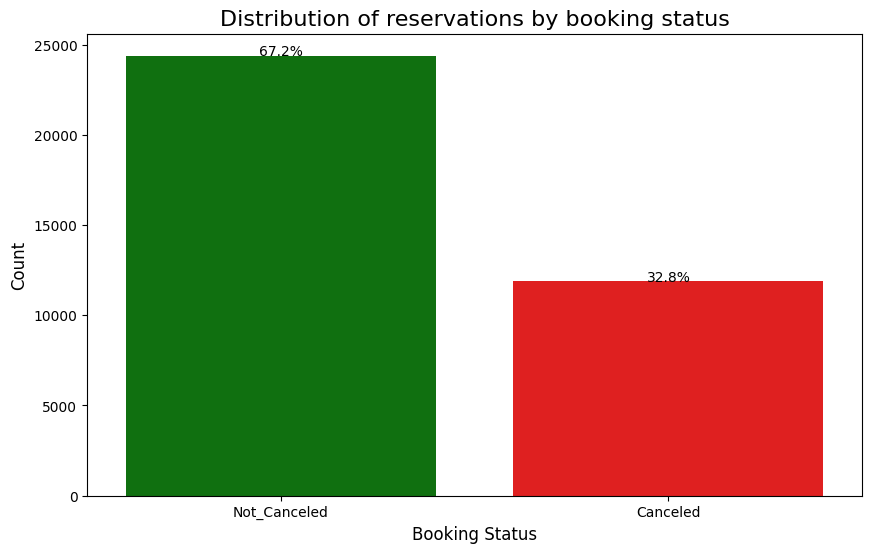

In [ ]:
colours = ['#008000', '#FF0000']

total_entries = len(df)

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='booking_status', data= df, palette=colours)

for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total_entries
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{percentage:.1f}%',
            ha="center")

ax.set_title('Distribution of reservations by booking status', fontsize=16)
ax.set_xlabel('Booking Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()

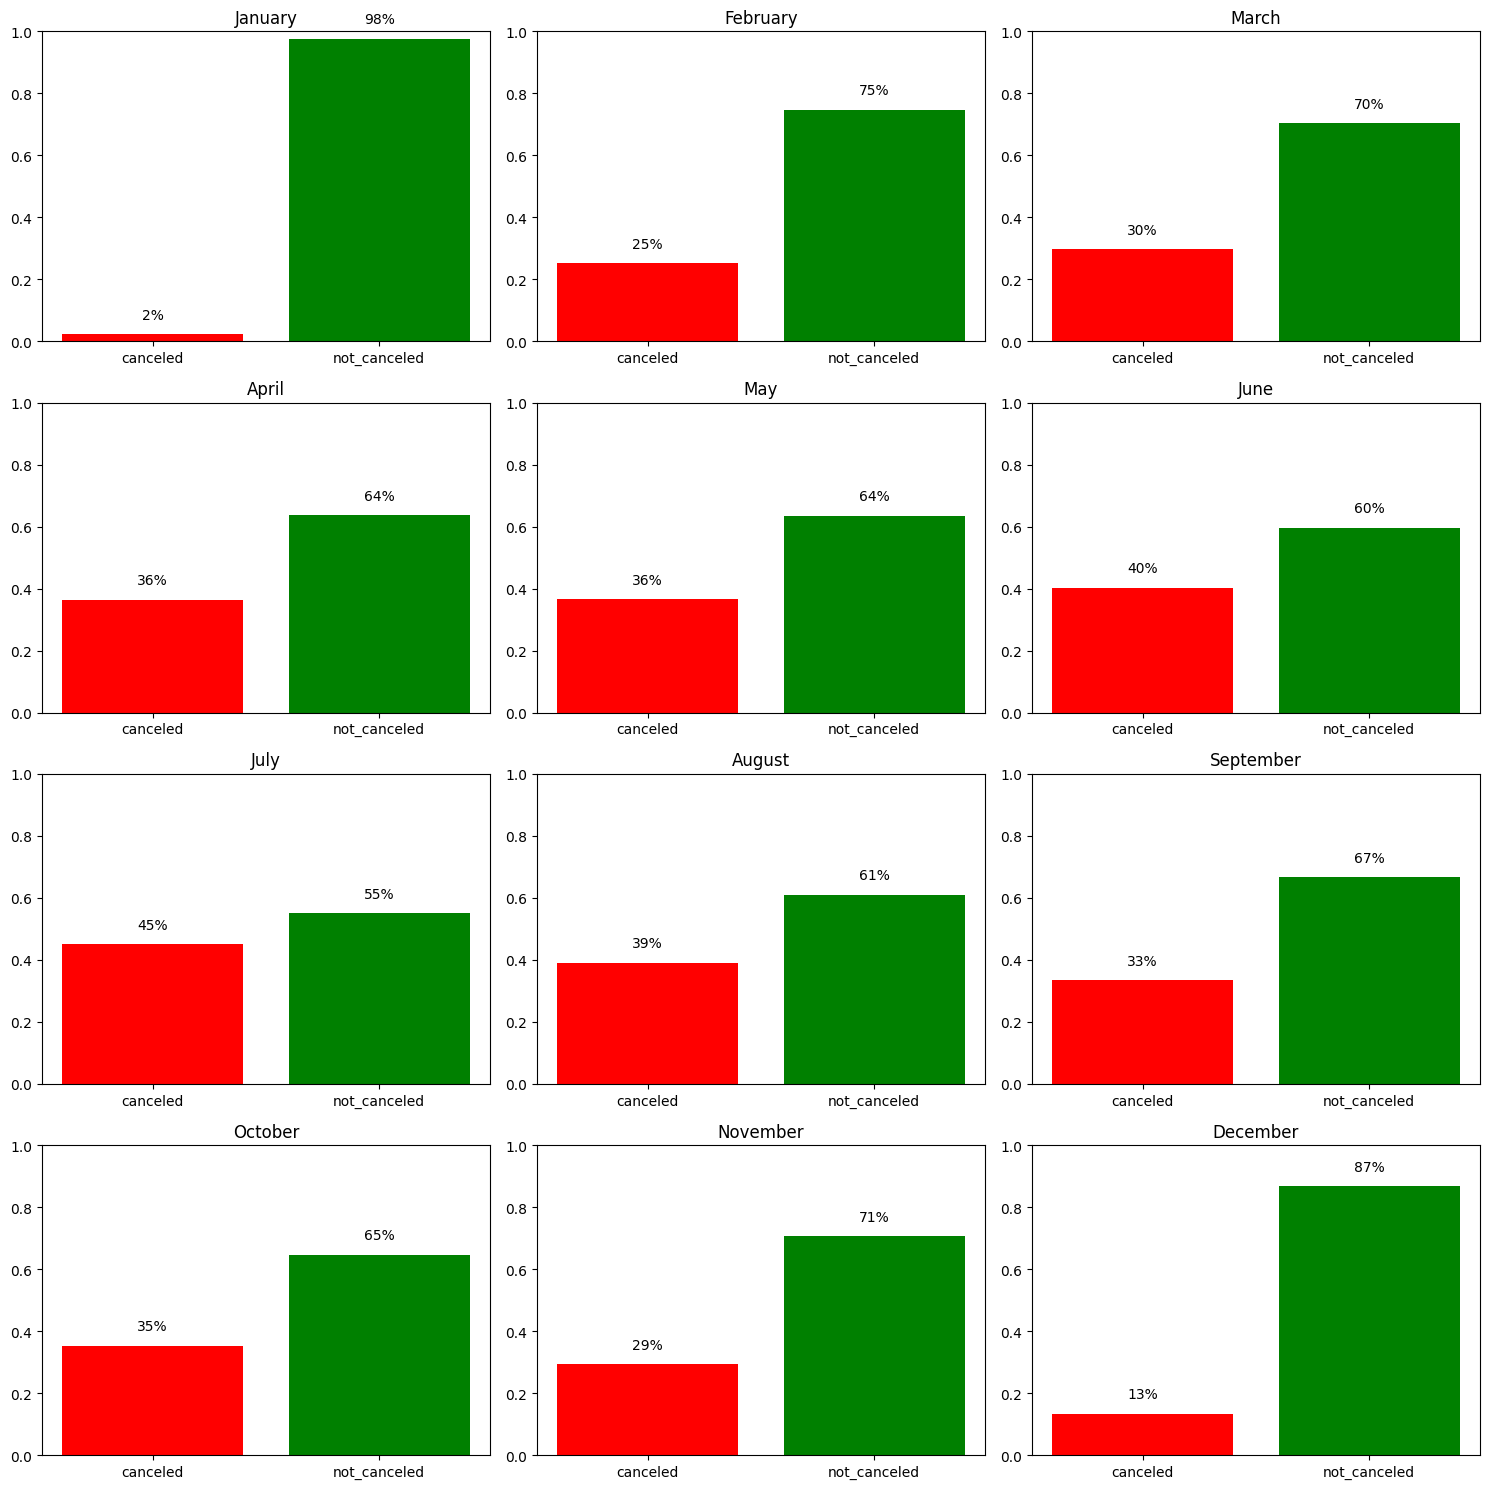

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, month in enumerate(range(1, 13)):
    ax = axes[i]
    df_month = df[df['arrival_month'] == month]
    ax.set_title(months[i])
    ax.set_ylim(0, 1)
    for j, val in enumerate(df_month['booking_status'].value_counts(normalize=True).sort_index()):
      ax.bar(['canceled', 'not_canceled'][j], val, color = ['#FF0000', '#008000'][j])
      ax.text(['canceled', 'not_canceled'][j], val+0.05, f"{val*100:.0f}%", ha='center')

plt.tight_layout()
plt.show()

# From the graphs above it can be observed that cancellation peaks in June and July, but drops considerable in the low booking period, well below the average of 32%.

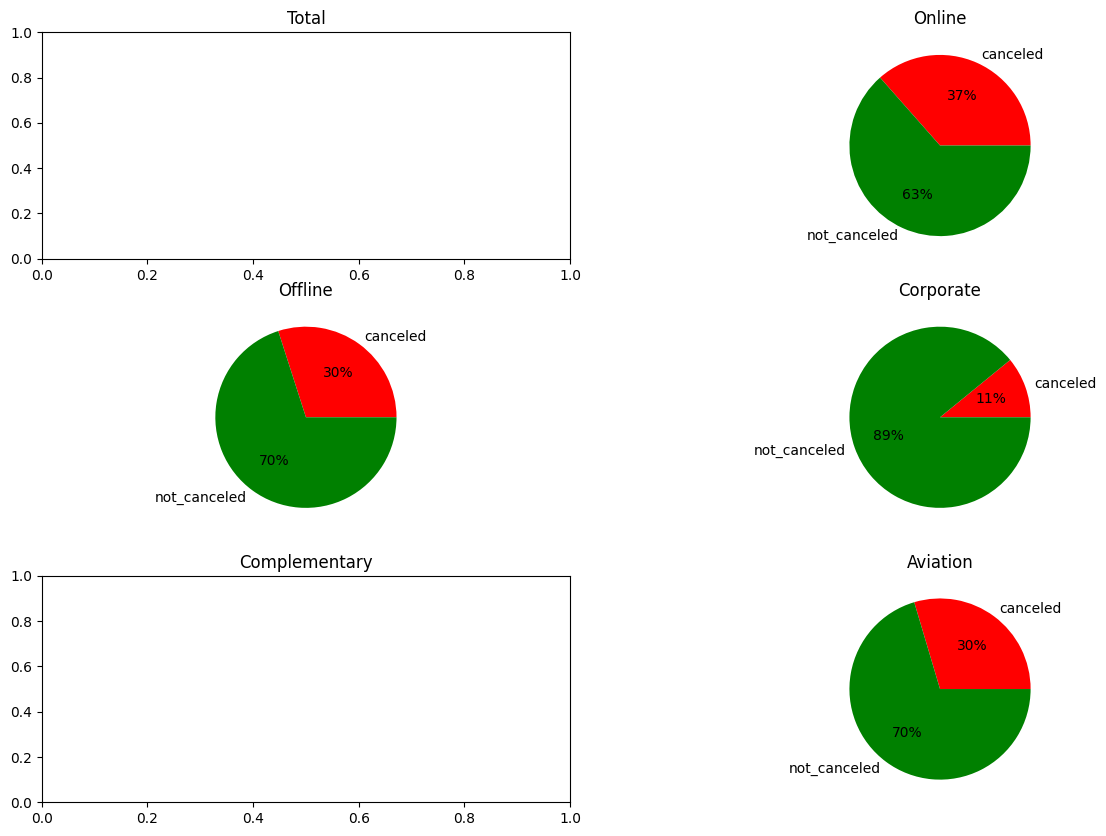

In [ ]:
# import matplotlib.pyplot library and create a new figure with dimensions 15 inches by 10 inches
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10))

subplot_titles = ['Total', 'Online', 'Offline', 'Corporate', 'Complementary', 'Aviation']
market_segments = ['', 'Online', 'Offline', 'Corporate', 'Complementary', 'Aviation']

colours = ['#FF0000', '#008000']

for i in range(1, 7):
    ax = fig.add_subplot(3, 2, i)
    ax.set_title(subplot_titles[i-1])
    if market_segments[i-1] == '':
        data = df.groupby('booking_status')['Booking_ID'].count()
        labels = ['canceled', 'not_canceled']
    else:
        data = df[df['market_segment_type'] == market_segments[i-1]].groupby('booking_status')['Booking_ID'].count()
        if market_segments[i-1] == 'Complementary':
            labels = ['not_canceled']
        else:
            labels = ['canceled', 'not_canceled']
            ax.pie(data, autopct='%.0f%%', labels=labels, colors=colours)

plt.show()

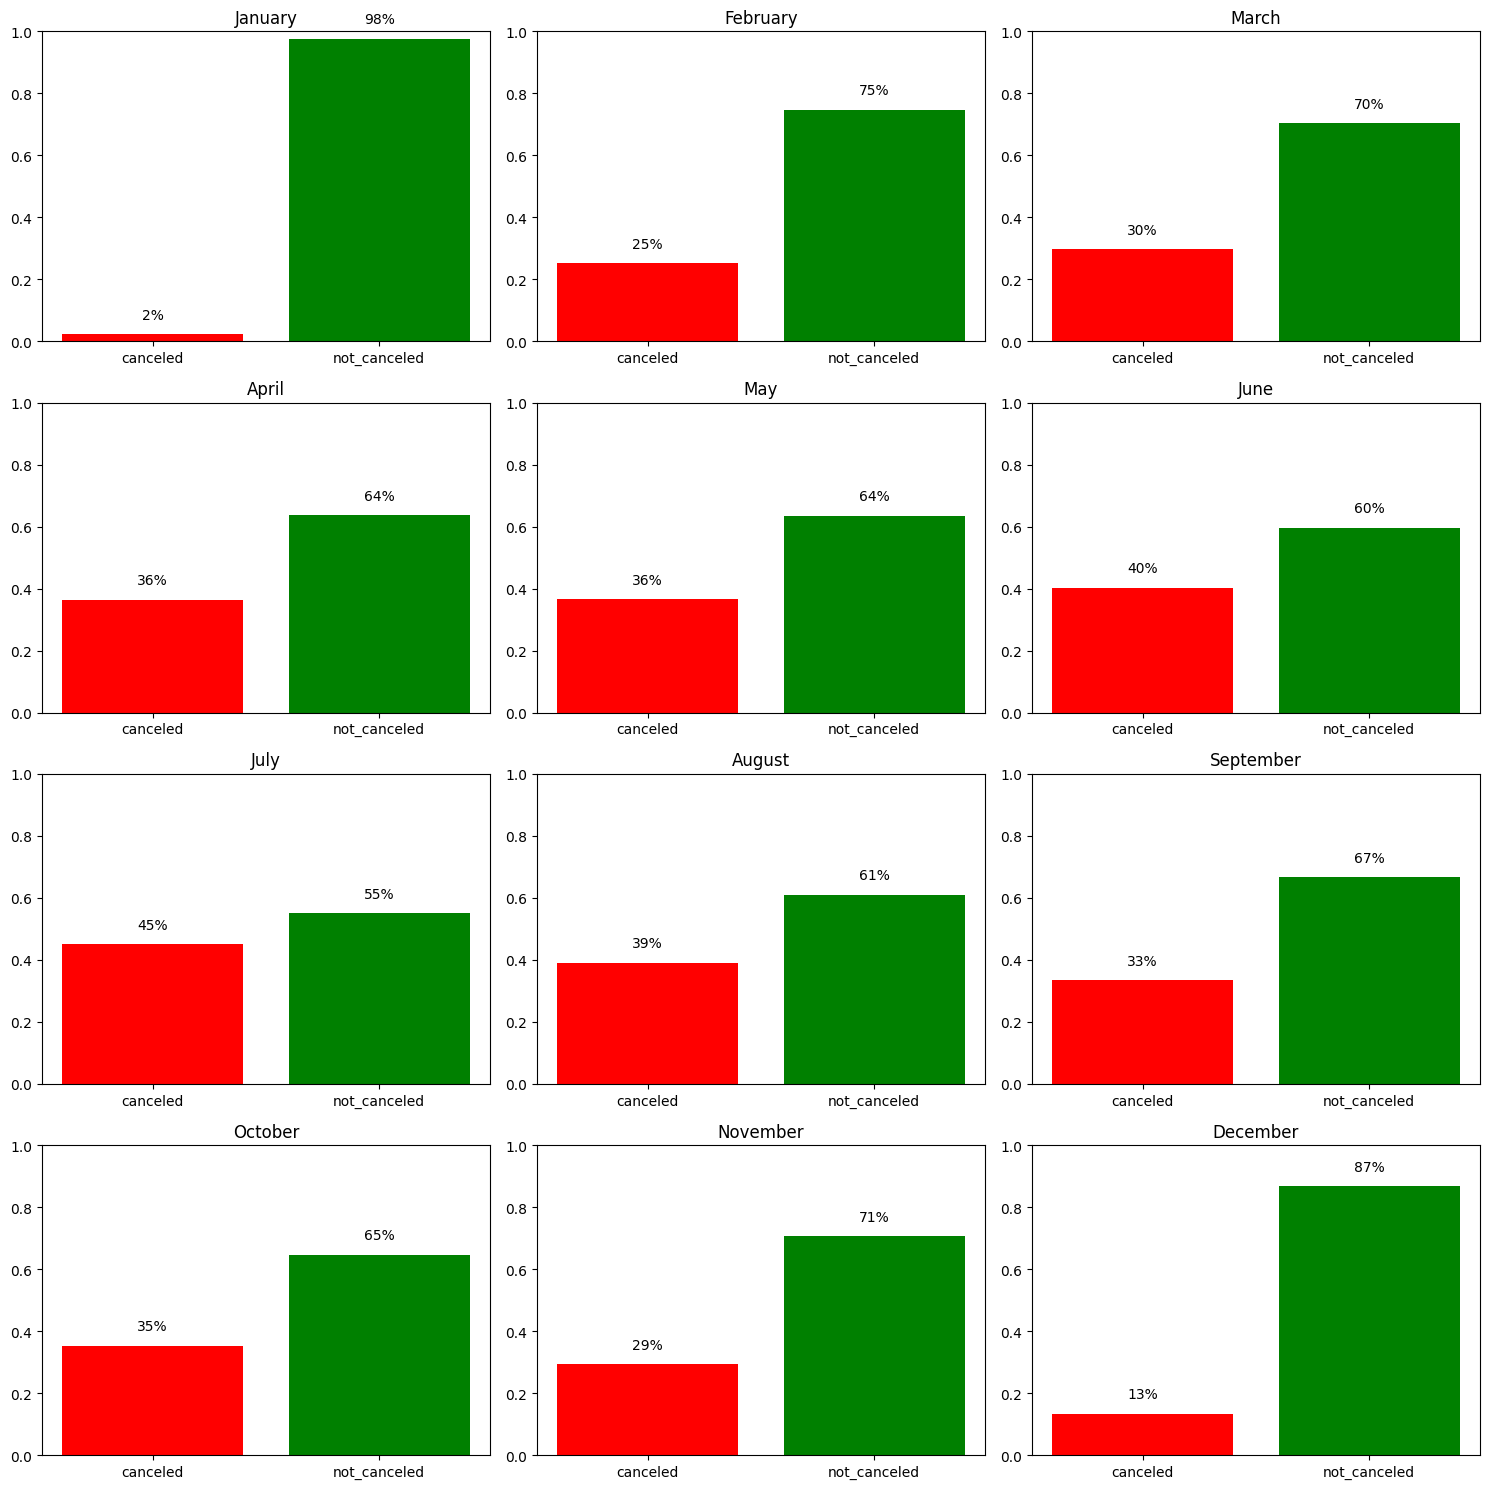

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15)) # using the matplotlib library to create a figure with subplots for each month of the year
axes = axes.flatten()

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, month in enumerate(range(1, 13)):
    ax = axes[i]
    df_month = df[df['arrival_month'] == month]
    ax.set_title(months[i])
    ax.set_ylim(0, 1)
    for j, val in enumerate(df_month['booking_status'].value_counts(normalize=True).sort_index()):
      ax.bar(['canceled', 'not_canceled'][j], val, color = ['#FF0000', '#008000'][j])
      ax.text(['canceled', 'not_canceled'][j], val+0.05, f"{val*100:.0f}%", ha='center')

plt.tight_layout()
plt.show()

The cancellation rate has a very similar distribution among the market segments, with the exception of the corporate segment which has a much lower cancellation rate

One assumption I had initially regarding the room types is that they would be in increasing order of price, but plotting the average price in each one I saw that was wrong

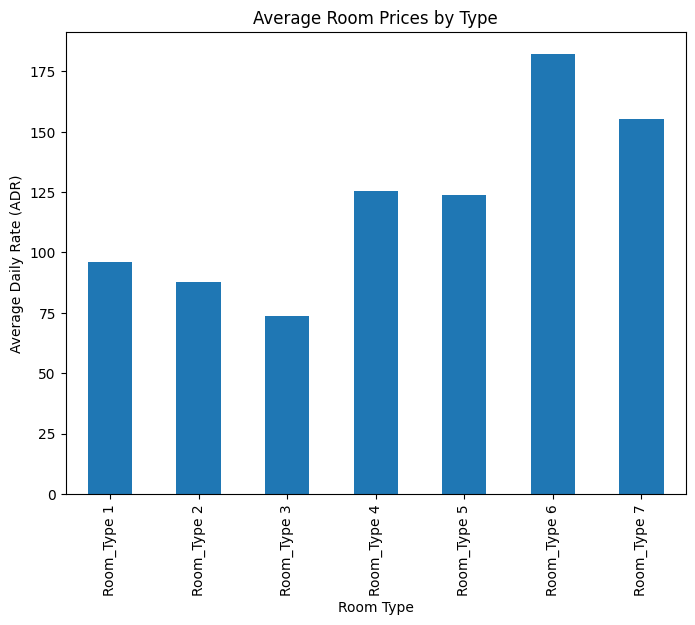

In [ ]:
# Group the data by room_type_reserved and calculate the average adr for each group
room_type_prices = df.groupby('room_type_reserved')['avg_price_per_room'].mean()


# Plot a bar graph of average prices by room type
room_type_prices.plot(kind='bar', figsize=(8, 6), color='#1f77b4')
plt.xlabel('Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('Average Room Prices by Type')
plt.show()

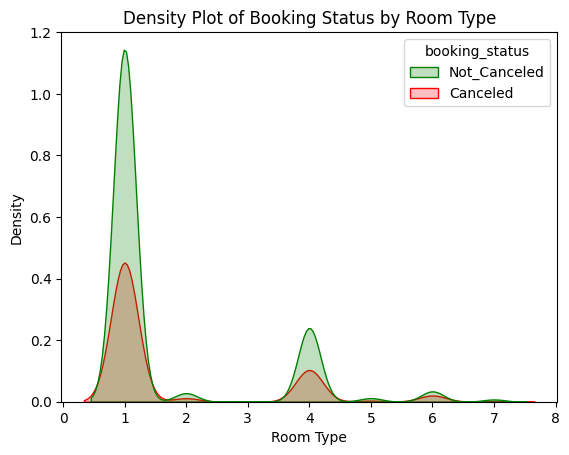

In [ ]:
#convert the room_type_reserved column to integer type using the .astype() method
df['room_type_reserved'] = df['room_type_reserved'].replace({
    'Room_Type 1': 1,
    'Room_Type 2': 2,
    'Room_Type 3': 3,
    'Room_Type 4': 4,
    'Room_Type 5': 5,
    'Room_Type 6': 6,
    'Room_Type 7': 7
})
df['room_type_reserved'] = df['room_type_reserved'].astype(int)

# Set the colours
colours = ['#008000', '#FF0000']

# Generate the density plot
sns.kdeplot(data=df, x='room_type_reserved', hue='booking_status', palette=colours, fill=True)

# Set Title and Labels
plt.title('Density Plot of Booking Status by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Density')

plt.show()

Plotting a density plot of the cancellations by room type, one can observe a very homogeneous and proportional distribution

Some hypothetical assumptions where formed as most important during this analysis: the longer length of stay, the greater the chances of cancellation:

The earlier the reservation, the greater the chances of cancellation
The longer length of days to stay, the greater the chances of cancellation
The more expensive the reservation, the lower the chances to cancel

Text(0, 0.5, 'Density')

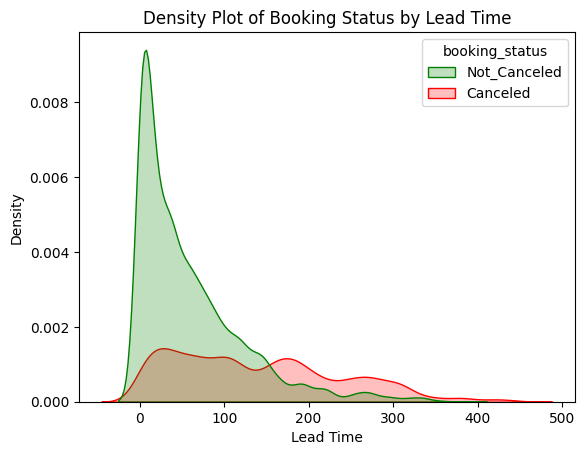

In [ ]:
colors = ['#008000', '#FF0000']
sns.kdeplot(data=df, x='lead_time', hue='booking_status', palette=colors, fill=True)

plt.title('Density Plot of Booking Status by Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Density')

Here it is observed that the first hypothesis is correct: Reservations made for the same day or for a few days ahead are almost certain to be fulfilled, but reservations 100 days in advance become more uncertain, until approximately 200 days in advance cancellation becomes more likely

Text(0, 0.5, 'Density')

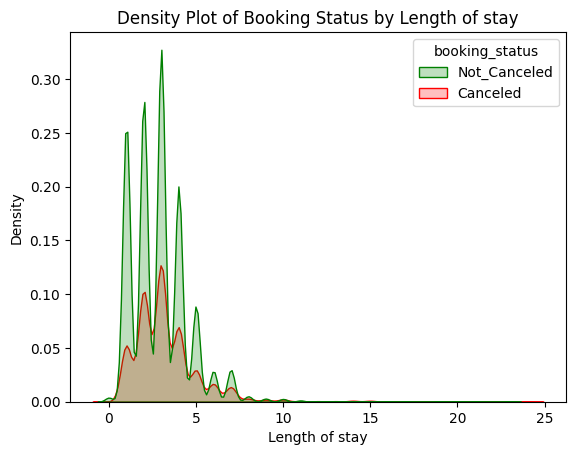

In [ ]:
df['length_of_stay'] = df['no_of_weekend_nights'] + df['no_of_week_nights']

colors = ['#008000', '#FF0000']
sns.kdeplot(data=df, x='length_of_stay', hue='booking_status', palette=colors, fill=True)

plt.title('Density Plot of Booking Status by Length of stay')
plt.xlabel('Length of stay')
plt.ylabel('Density')

The second hypothesis is also true, but in a less discrepant way. Length of stay of up to 5 days tend to be fulfilled more often, unlike longer days.

<Axes: xlabel='booking_status', ylabel='avg_price_per_room'>

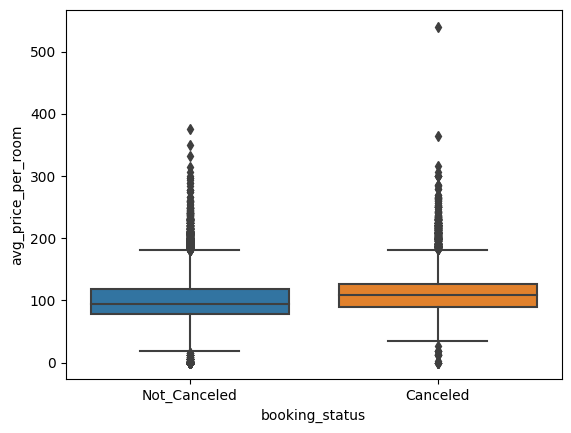

In [ ]:
sns.boxplot(x='booking_status', y='avg_price_per_room', data=df)


Text(0, 0.5, 'Density')

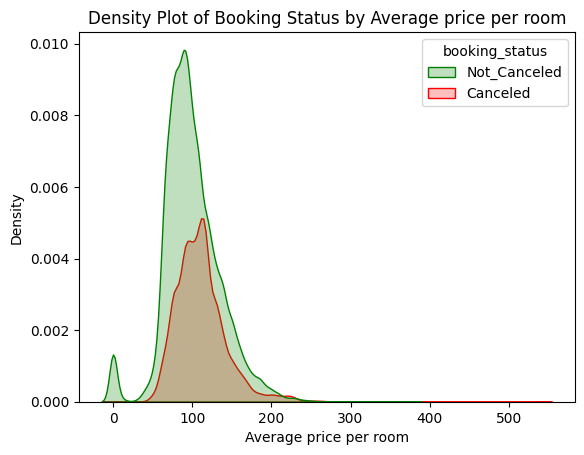

In [ ]:
colors = ['#008000', '#FF0000']
sns.kdeplot(data=df, x='avg_price_per_room', hue='booking_status', palette=colors, fill=True)

plt.title('Density Plot of Booking Status by Average price per room')
plt.xlabel('Average price per room')
plt.ylabel('Density')

The third hypothesis is not confirmed, the cancellation distribution is quite homogeneous with one exception: Free Reservations.
Sales or prizes that give a free stay make the reservation always or almost always fulfilled.

Finally, an examination of the heatmap of correlations plotted by pandas.profilling, it is observed that the correlation between the number of special requests and cancellation is very high, i.e. more special requests generate less cancellation. Graphically we have:

Text(0, 0.5, 'Density')

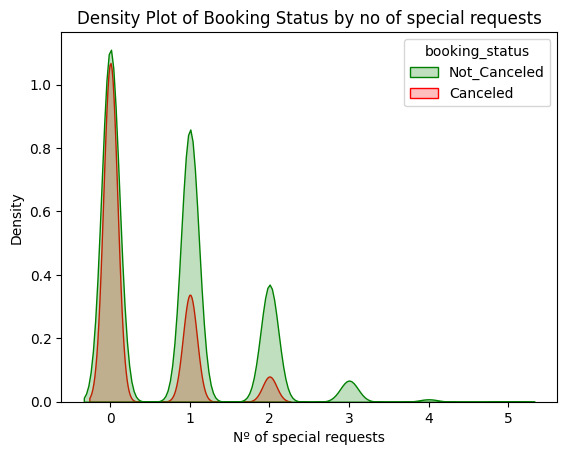

In [ ]:
colors = ['#008000', '#FF0000']
sns.kdeplot(data=df, x='no_of_special_requests', hue='booking_status', palette=colors, fill=True)

plt.title('Density Plot of Booking Status by no of special requests')
plt.xlabel('Nº of special requests')
plt.ylabel('Density')

Confirming what was already expected. At the end of the data treatment I will plot another heatmap for the correlation with the booking_status variable but this time with everything converted to numeric



# **Feature** **Engineering**

In [ ]:
#Cleaning the dateset
df.drop(['Booking_ID'],axis=1,inplace=True)    # Booking_ID is useless
print(df.isnull().sum())      # Check abnormal null number

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
length_of_stay                          0
dtype: int64


In [ ]:
df.drop(df[(df["no_of_adults"]==0) & (df["no_of_children"]==0)].index,axis=0,inplace=True)  #Drop person number = 0
print(df[(df["no_of_adults"]==0) & (df["no_of_children"]>0)]) #Seems abnormal: no adults but have children

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
32                0               2                     0                  3   
287               0               2                     2                  2   
653               0               2                     1                  2   
937               0               2                     0                  3   
954               0               2                     1                  1   
...             ...             ...                   ...                ...   
34720             0               2                     0                  3   
34730             0               2                     1                  1   
34890             0               2                     2                  2   
35691             0               2                     2                  1   
35797             0               2                     0                  2   

      type_of_meal_plan  required_car_p

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

The dataset has 36,275 rows and 19 columns.

Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type, and booking_status are of object type while the rest columns are numeric.

There are no null values in the dataset.

Booking_ID column is an identifier. Next is to check if each entry of the column is unique.

Observations:

It can be seen that all the entries of this column are unique. Hence, this column would not add any value to the analysis.
Therefore this column can be dropped. Before proceeding to split the data into train and test set.



The categorical variables are transformeed into numeric data, the column for the year of stay is dropped, since this will not be repeated, it does not appear to be valuable for the model.  Before the data is sepaerated into training and testing sets

In [ ]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  0                           0                   1   
1                  3                           0                   1   
2                  0                           0                   1   
3                  0                           0                   1   
4                  3                           0                   1   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0        224          2017             10             2                    3   
1          5          2018             11             6                    4   
2          1          2018              2            28                    4   
3        211          2018              5            20                    4   
4         48          2018              4            11                    4   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  booking_status  length_of_stay  
0                       0               1               3  
1                       1               1               5  
2                       0               0               3  
3                       0               0               2  
4                       0               0               2

1. Split the data into training and test sets.
Let us start by defining a split to divide the data into training and test sets. The basic idea is to train the model on a portion of the data and test its performance on the other portion that has not been seen by the model. This is done in order to prevent overfitting.

In [ ]:
# List all numerical features
features_num = [
    "no_of_children","no_of_weekend_nights","no_of_week_nights","required_car_parking_space",
            "repeated_guest","no_of_previous_cancellations","no_of_previous_bookings_not_canceled","avg_price_per_room",
            "no_of_special_requests","lead_time"
]


# List all categorical features
features_cat = [
    "type_of_meal_plan", "room_type_reserved","market_segment_type"
]

features = features_num + features_cat

X = df[features]
y = df["booking_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 420)

2. Preprocess the data
The next step is to set up a pipeline to preprocess the features. We will impute all missing values with a constant, and one-hot encode all categorical features.




In [ ]:
transformer_num = SimpleImputer(strategy="constant")

transformer_cat = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", transformer_num, features_num),
    ("cat", transformer_cat, features_cat)
])

preprocessor

ColumnTransformer(transformers=[('num', SimpleImputer(strategy='constant'),
                                 ['no_of_children', 'no_of_weekend_nights',
                                  'no_of_week_nights',
                                  'required_car_parking_space',
                                  'repeated_guest',
                                  'no_of_previous_cancellations',
                                  'no_of_previous_bookings_not_canceled',
                                  'avg_price_per_room',
                                  'no_of_special_requests', 'lead_time']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['type_of_meal_plan', 'room_type_reserved',
                                  'market_segment_type'])])

4. Fit the models and evaluate performance
Next, we extend the pipeline to fit a Decision Tree model on the training data.

In [ ]:
# Compose data preprocessing and model into a single pipeline
steps = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=1234))
])
steps.fit(X_train, y_train)

ValueError: ignored

To see how well our model performed, we'll calculate and visualize a confusion matrix, and calculate the accuracy of the model



In [ ]:
y_pred = steps.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=steps.classes_)
disp.plot(cmap='Blues', xticks_rotation='horizontal')
plt.title("Confusion Matrix")
plt.show()

AttributeError: ignored

In [ ]:
y_pred = steps.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)
conf = confusion_matrix(y_test, y_pred)
accuracy = float((conf[0][0] + conf[1][1]))/float(np.sum(conf))
print(accuracy)

AttributeError: ignored

In [ ]:
# Calculate and print accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.8491224846090233


#Prepare data for modeling
Models cannot take non-numeric inputs.
First step create dummy variables for all the categorical variables.
Before splitting the data into train and test sets.

1. Drop the target variable from the original data and store it in a separate dataframe X
2. Store the target variable in a separate series Y

https://www.kaggle.com/code/chuyuliucs/hotel-booking-analysis-ml

#Convert all the categorical values to integer codes

In [ ]:
# Defining a Function to Convert Objects to Int (use LabelEncoder().fit_transform)
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
# Change all data to numerical values
df = df.apply(lambda x: object_to_int(x))
X = df.drop(columns = ['booking_status'])
y = df['booking_status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)# Defining a Function to Convert Objects to Int (use LabelEncoder().fit_transform)
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
# Change all data to numerical values
df = df.apply(lambda x: object_to_int(x))
X = df.drop(columns = ['booking_status'])
y = df['booking_status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

The training set contains 80% of the data and the testing set contains 20% of the data.
use random_state parameter to 99 to ensure the same split is
generated each time the code is executed.
 0 and 1 representing canceled and not canceled

<ipython-input-56-055c4aefa3cb>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




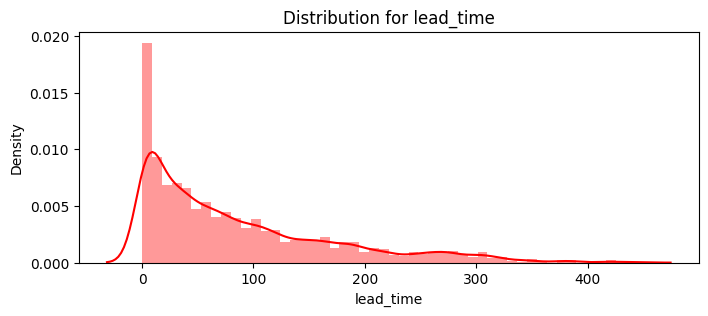

In [ ]:
#Scale to the same range, the features in different value range

num_cols = ['no_of_children','no_of_weekend_nights','no_of_week_nights','required_car_parking_space',
            'repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room',
            'no_of_special_requests','lead_time']

# to make distribution graph
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

# to show there are features in different value range (scale them to same range)
for feat in num_cols[9:11]: distplot(feat, df)
plt.show()

# Scale them to same range
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')), columns=num_cols)

Plot shows the distribution of the feature values in the dataset.

## Use classification metrics: precision, recall


SUPPORT VECTOR CLASSIFIER (SVC)



SVM accuracy is : 0.7666436940041351
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.42      0.54      2374
           1       0.77      0.93      0.84      4881

    accuracy                           0.77      7255
   macro avg       0.76      0.68      0.69      7255
weighted avg       0.76      0.77      0.74      7255

------------------------------------------------------------


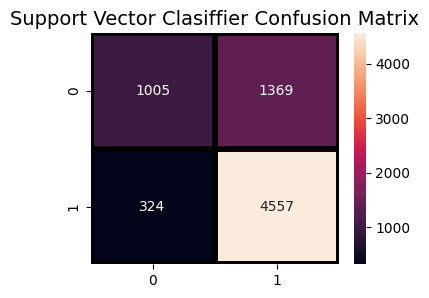

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test, y_test)
print("SVM accuracy is :", accuracy_svc)
print('-' * 60)
print(classification_report(y_test, predict_y))
print('-' * 60)
plt.figure(figsize=(4, 3))
# macro-average F1-score of 0.69 and a weighted-average F1-score of 0.74. This means that the overall performance
# of the model is better captured by the weighted-average because the dataset is imbalanced
# (class 1 has more samples than class 0)
sns.heatmap(confusion_matrix(y_test, predict_y),
            annot=True, fmt="d", linecolor="k", linewidths=3)
# to understand the graph: the (0,0) value represents the number of instances that were actually in class 0 and were correctly predicted to be in class 0
plt.title("Support Vector Clasiffier Confusion Matrix", fontsize=14)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



0.8490696071674707
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.63      0.73      2374
           1       0.84      0.96      0.90      4881

    accuracy                           0.85      7255
   macro avg       0.86      0.79      0.81      7255
weighted avg       0.85      0.85      0.84      7255

------------------------------------------------------------


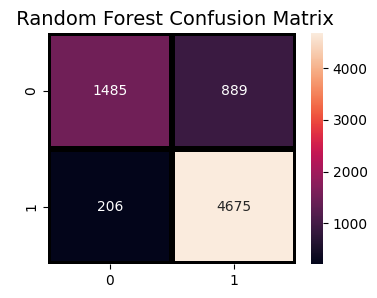

------------------------------------------------------------


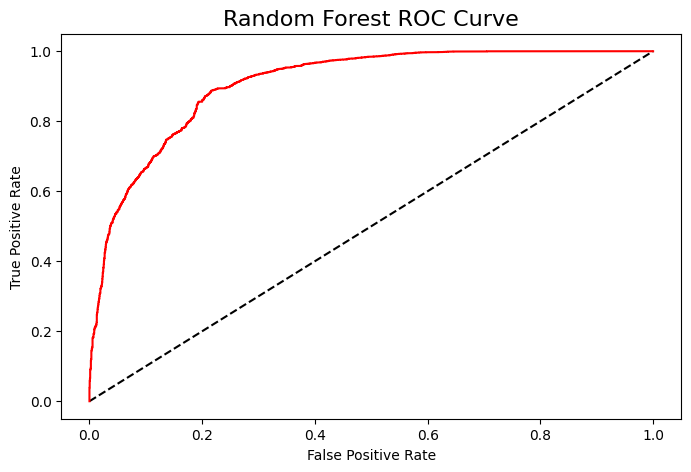

In [ ]:
#RANDOM FOREST CLASSIFIER
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =65, max_features = "auto",
                                  max_leaf_nodes = 35)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))
print('-'*60)

# 500, 50, 30
print(classification_report(y_test, prediction_test))
print('-'*60)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" Random Forest Confusion Matrix",fontsize=14)
plt.show()
print('-'*60)

y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show()

LOGISTIC REGRESSION



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression accuracy is : 0.7878704341833218
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.55      0.63      2374
           1       0.80      0.90      0.85      4881

    accuracy                           0.79      7255
   macro avg       0.77      0.73      0.74      7255
weighted avg       0.78      0.79      0.78      7255

------------------------------------------------------------


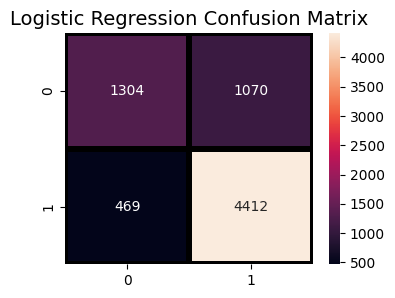

------------------------------------------------------------


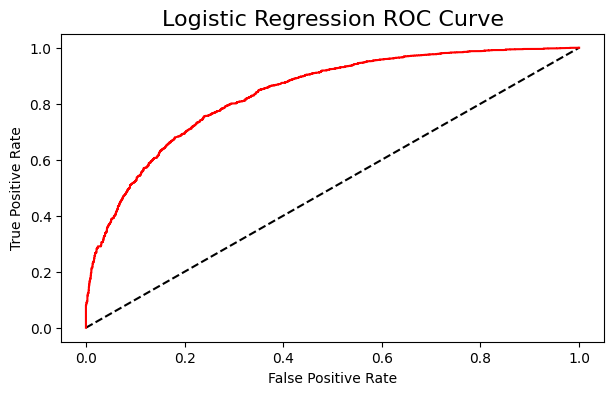

In [ ]:
#LOGISTIC REGRESSION
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
print('-'*60)

lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

print('-'*60)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("Logistic Regression Confusion Matrix",fontsize=14)
plt.show()

print('-'*60)

y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

**# DECISION TREE CLASSIFIER**

Decision Tree accuracy is : 0.8671261199172984
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      2374
           1       0.91      0.90      0.90      4881

    accuracy                           0.87      7255
   macro avg       0.85      0.85      0.85      7255
weighted avg       0.87      0.87      0.87      7255



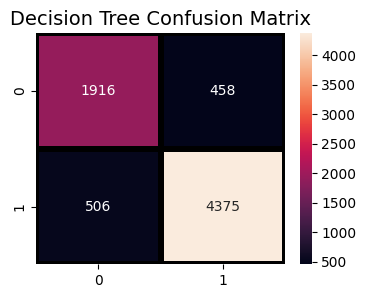

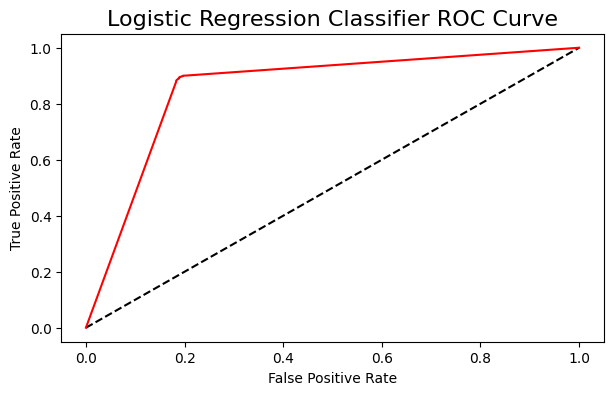

In [ ]:
# DECISION TREE CLASSIFIER
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

print(classification_report(y_test, predictdt_y))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictdt_y),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("Decision Tree Confusion Matrix",fontsize=14)
plt.show()

y_pred_prob = dt_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Classifier ROC Curve',fontsize=16)
plt.show();

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters to search over
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga']
}

# Create an instance of logistic regression
lr_model = LogisticRegression()

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(lr_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy:", grid_search.best_score_)


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 64, in _check_solver
    raise ValueError(
ValueError: Only 'sa

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.800447966919366


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define the decision tree classifier
dt_model = DecisionTreeClassifier()

# Define the hyperparameters to search
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [5, 10, 15, 20],
          'min_samples_split': [2, 5, 10, 20],
          'min_samples_leaf': [1, 2, 4],
          'max_features': ['sqrt', 'log2']}

# Define the scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

# Perform the grid search
grid_dt = GridSearchCV(estimator=dt_model, param_grid=params, scoring=scoring, refit='f1', cv=5)
grid_dt.fit(X_train, y_train)

# Print the best hyperparameters and scores
print("Best parameters: ", grid_dt.best_params_)
print("Best F1 score: ", grid_dt.best_score_)
print("Best accuracy score: ", grid_dt.cv_results_['mean_test_accuracy'][grid_dt.best_index_])
print("Best precision score: ", grid_dt.cv_results_['mean_test_precision'][grid_dt.best_index_])
print("Best recall score: ", grid_dt.cv_results_['mean_test_recall'][grid_dt.best_index_])


Best parameters:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1 score:  0.8974615273445062
Best accuracy score:  0.8620951068228807
Best precision score:  0.897253061130799
Best recall score:  0.8976883662549694


In [ ]:
from sklearn.model_selection import GridSearchCV

# define the parameter grid to search over
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 20, 30],
    'criterion' :['gini', 'entropy']
}

# define the model to use
rf_model = RandomForestClassifier(random_state=65, max_leaf_nodes=35)

# create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=['recall', 'precision', 'f1'],
                           refit=False, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# print the best hyperparameters and scores
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Scores:', grid_search.best_score_)


AttributeError: ignored

In [ ]:
df.to_csv('HotelCancelation_880.csv')